<!--BOOK_INFORMATION-->
This notebook contains both adapted and unmodified material from: 
[Introduction to Machine Learning with Python](https://learning.oreilly.com/library/view/introduction-to-machine/9781449369880/)
by Sarah Guido, Andreas C. Müller; the content is available [on GitHub](https://github.com/amueller/introduction_to_ml_with_python/blob/master/02-supervised-learning.ipynb).

# 09 Machine Learing Part 1  
## CLASS MATERIAL
<br> <a href='#WhyMachineLearning?'>1. Why Machine Learning?</a>
<br> <a href='#MachineLearningPython'>2. Machine Learning with Python</a> 
<br> <a href='#FirstMachineLearningApplication'>3. First Machine Learning Application</a> 
<br> <a href='#ImportingData'>4. Importing Data</a> 
<br><a href='#ReviewExercises'>5. Review Exercises</a>

# Download the new class notes.
__Navigate to the directory where your files are stored.__

__Update the course notes by downloading the changes__




##### Windows
Search for __Git Bash__ in the programs menu.

Select __Git Bash__, a terminal will open.

Use `cd` to navigate to *inside* the __ILAS_PyEng2019__ repository you downloaded. 

Run the command:
>`./automerge`



##### Mac
Open a terminal. 

Use `cd` to navigate to *inside* the __ILAS_PyEng2019__ repository you downloaded. 

Run the command:
>`sudo ./automerge`

Enter your password when prompted. 

## Data Science
A field that uses scientific methods, processes, algorithms and systems to extract knowledge and insights from structured and unstructured data.

It employs techniques and theories drawn from many fields within the context of mathematics, statistics, computer science, and informatics. 

Data sets are modelled and curated to find patterns and make predictions about the future. 

## Machine Learning 

In Machine learning, algorithms acquire the knowledge or skill through experience. 

Machine learning relies on big data sets to identify patterns.

## Artificial Intelligence (AI)
<br>AI is the study of enabling machines to make decisions independently without the need for human interference. 

Therefore AI tends to be used in situations where adapting to new scenarios are important.
<br>As this often involves acquiring knowledge and learning to apply it, Machine Learning is a widely used approach for AI. 

AI has broad application ranging from robotics to text analysis.

<img src="img/machine_learning_AI.png" alt="Drawing" style="width: 300px;"/>

### Lesson Goal

- An introduction to machine learning 
- A simple machine learning example:
    - Check data is suitable for analysis using machine learning
    - Choose and import a model
    - Fit the model to the traning data
    - Analyse the accuracy of the model



### Fundamental programming concepts

- working with `scikit_learn` and `mglearn` packages
- develpoing models using Pandas `DataFrames`


Machine learning methods have in recent years become extremely widely used in everyday life:
- automatic recommendations of which movies to watch
- what food to order
- which products to buy
- personalized online music
- recognizing your friends in your photos

Many modern websites and devices have machine learning algorithms at their core. 

Every part of a complex website like Facebook, Amazon, or Netflix contains multiple machine learning models.



Machine learning has also influenced on the way data-driven research is done today and applied to diverse scientific problems:
- understanding stars
- finding distant planets
- discovering new particles
- analyzing DNA sequences
- providing personalized cancer treatments

<a id='WhyMachineLearning?'></a>
# 1. Why Machine Learning?

<br> <a href='#ProblemsMachineLearningCanSolve'>1.1. Problems Machine Learning Can Solve</a>
<br> <a href='#SupervisedLearningAlgorithms'>1.2 Supervised Learning Algorithms</a> 
<br> <a href='#UnsupervisedLearningAlgorithms'>1.3 Unsupervised Learning Algorithms</a> 



Early “intelligent” applications, used handcoded rules of “if” and “else” decisions, just like the ones you have leanrt to use, to process data.

__Example : "Hand-coded" sorting algorithm__
<br>Decide what type of sport an althlete plays based on their weight and height

<br>In the plot below, each of the circles represents the mean height and weight of athletes grouped by type. 
<br>The square represents the height and weight of an athlete to be classified. 
<img src="img/vector_quantisation.png" alt="Drawing" style="width: 700px;"/>


To find the closet point:
1. Use broadcasting to find the difference between the x,y cooridinates of the __square__ and the x, y coordinates of each __circle__. <br>
1. Find the euclidian distance, $d$ from the square, $s$ to each circle, $c$: <br>$d = \sqrt{(x_{c}-x_{s})^2 + (y_{c}-y_{s})^2}$ <br>
1. Classify athlete as the group corresponding to the minimum distance, $d_{min}$

In [1]:
import numpy as np

athletes = ['basketball player',
            'football lineman',
            'female gymnast',
            'marathon runner ']

athlete = np.array([111.0,188.0])

categories = np.array([[102.0, 203.0],
                       [132.0, 193.0],
                       [45.0, 155.0],
                       [57.0, 173.0]])

# 1. broadcast
diff = categories - athlete

# 2. distance to each point (magnitude of values along axis 1 for each datum)
# dist = np.linalg.norm(diff,axis=1)
dist = np.sqrt(np.sum(diff**2,axis=1))

# 3. which group?
nearest = np.argmin(dist)
print(athletes[nearest])

basketball player


The nearest group is index 0 of the array `catagories`.
<br>Based on mean height and weight, the athlete is most likely to be a basketball player.

__Example : An email spam filter__

> Task : move the appropriate incoming email messages to a spam folder. 

> Solution : Write list of "spam" words and sort emails by content using `if` and `else`

Using handcoded rules to make decisions has two major disadvantages:
- The logic required to make a decision is specific to a single domain and task. Changing the task even slightly might require a rewrite of the whole system.
- Designing rules requires a deep understanding of how a decision should be made by a human expert.

In [2]:
import pandas as pd


spam_folder = []


email_subject = pd.Series({'subject' : "You've won 1 Million dollars!"})


if email_subject.str.contains('Million dollars|MEET SINGLES|Serious cash|No credit check', case=False)[0]:
    
    spam_folder.append(email_subject)
    
    
spam_folder

[subject    You've won 1 Million dollars!
 dtype: object]

__Example of where the hand-coded approach will fail__ : Facial recognition.

Facial recognition was an unsolved problem until as recently as 2001.

Today every smartphone can detect a face in an image.

The way in which pixels (which make up an image in a computer) are “perceived” by the computer is very different from how humans perceive a face. 
<br>The difference in representation makes it almost impossible for a human to write a set of rules to describe what constitutes a face in a digital image.

However, by presenting a program with a large collection of images of faces, an algorithm can determine what characteristics are needed to identify a face.

 

<a id='ProblemsMachineLearningCanSolve'></a>
## 1.1 Problems Machine Learning Can Solve



Automated decision-making processes by:
- finding patterns in a group of examples.
- generalizing from known examples. 






#### Generalizing from known examples

This is known as __supervised learning__.

The user provides the algorithm with pairs of inputs and desired outputs.

The algorithm finds a way to produce the desired output given an input. 

In particular, the algorithm is able to create an output for an input it has never seen before without any help from a human. 



__Example : An email spam filter__

> Solution using machine learning:
- the user provides the algorithm with a large number of emails (input) and marks them as spam or not spam (desired output). 
- Given a new email, the algorithm predicts whether the new email is spam or not.

<a id='SupervisedLearningAlgorithms'></a>
## 1.2 Supervised Learning Algorithms



Machine learning algorithms that learn from input/output pairs.


A “teacher” provides supervision to the algorithms in the form of the desired outputs for each example that they learn from. 

While creating a dataset of inputs and outputs is often a laborious manual process, supervised learning algorithms are well understood and their performance is easy to measure. 





Examples of __supervised__ machine learning tasks:
- Identifying an address from handwriting on an envelope
    - Input : scan of the handwriting
    - Output : actual digits in the zip code
    - Training dataset (for building a machine learning model) : many images of envelopes with addresses input digitally.  

<br>

- Determining whether a tumor is benign based on a medical image
    - Input : the image
    - Output : whether the tumor is benign. 
    - Training dataset : database of medical images, each image tagged with expert diagnosis. 

<br>

- Detecting fraudulent activity in credit card transactions
    - Input : record of credit card transaction
    - Output : likely to be fraudulent or not.
    - Training dataset : recording all transactions and tag any where a user has reported fraudulant activity. 

<a id='UnsupervisedLearningAlgorithms'></a>
## 1.3 Unsupervised Learning Algorithms 



Only the input data is known.

No known output data is given to the algorithm. 

There are many successful applications of these methods, but they are usually harder to understand and evaluate. 


 

Examples of __unsupervised learning__:

- Identifying topics in a set of blog posts : 
    - summarize a large collaection of text data and find prevalent themes. 
    - topics and number of topics may be unknown --> no known outputs.

- Dividing customers by preference
    - identify which customers are similar (e.g. “parents,” “students, “gamers”)
    - group by similar preferences. 
    - groups, number of groups, size of groups --> no known outputs.

- Detecting abnormal access patterns to a website
     - find abnormal access patterns to identify abuse or bugs.
     - each abnormal pattern may be different, there may be no records of abnormal behaviour --> no known outputs   
   

For both supervised and unsupervised learning tasks, it is important to have a representation of your input data that a computer can understand. 

It can be helpful to arrange your data as a table. 

__Rows__ : each data point(each email, each customer, each transaction)

__Columns__ : properties of each data point (age of a customer or the amount/location of a transaction)

Later we will go into more detail on the topic of building a good representation of your data (known as feature extraction or feature engineering).

Examples : 

Shop
<br>Rows : customers 
<br>Columns : age, gender, purchased items

Tumor 
<br>Rows : image of tumor
<br>Columns : grayscale values of each pixel, size/shape/color of the tumor



In machine learning 

Rows are known as a samples (or data point)

Columns are called features.



### Understanding Your Task and Understanding Your Data
Quite possibly the most important part in the machine learning process is understanding:
- the data you are working with
- how it relates to the task you want to solve. 

It is a good idea to keep the bigger picture in mind at all times.

This will avoid spending much time building a complex machine learning solution that does not solve the right problem.

It is not an effective strategy to randomly choose an algorithm and run it on your data.

Each algorithm is different in terms of what kind of data and what problem setting it works best for.




It is necessary to understand what is going on in your dataset before you begin building a model. 

- What question(s) are you trying to answer? Do I think the data collected can answer that question?

- What is the best way to phrase the question(s) as a machine learning problem?

- Have you collected enough data to represent the problem I want to solve?

- What features of the data did I extract, and will these enable the right predictions?

- How will I measure success in my application?





<a id='MachineLearningPython'></a>
# 2. Machine Learning with Python

Large array of general-purpose and specialized functionality:
<br>Libraries for data loading, visualization, statistics, natural language processing, image processing...

Machine learning and data analysis are fundamentally iterative processes and require tools to iterate as fast as possible. 

Python also allows for the creation of complex graphical user interfaces (GUIs) and web services, and for integration into existing systems.

# `scikit-learn`

- contains a number of state-of-the-art machine learning algorithms + documentation about each algorithm.
- open source project: constantly being developed and improved
- active user community
- most widely used Python library for machine learning. 
- widely used in industry and academia
- works well with a number of other scientific Python tools.


<a id='InstallPandas'></a>
# Install  `scikit-learn` and `mglearn`



##### Windows 

1. Open the Anaconda Prompt from the terminal.
<p align="center">
  <img src="img/anaconda_prompt.png" alt="Drawing" style="width: 300px;"/>
</p>

1. Run the following:  
>`conda install -c intel scikit-learn`<br>
>`conda install -c intel mglearn`<br>
>`conda install python-graphviz`

or alternatively:

>`pip install -U scikit-learn`<br>
>`pip install mglearn`<br>
>`pip install python-graphviz`





##### Mac

1. Open a terminal. 

1. Type the following:  
>`conda install -c intel scikit-learn`<br>
>`conda install -c intel mglearn`<br>
>`conda install python-graphviz`

or alternatively:

>`pip install -U scikit-learn`<br>
>`pip install mglearn`<br>
>`pip install python-graphviz`

Check `scikit` learn and all the other packages you need are installed correctly:

In [3]:
import sys
print("Python version:", sys.version)

import pandas as pd
print("pandas version:", pd.__version__)

import matplotlib
print("matplotlib version:", matplotlib.__version__)
import matplotlib.pyplot as plt

import numpy as np
print("NumPy version:", np.__version__)

import scipy as sp
print("SciPy version:", sp.__version__)

import IPython
print("IPython version:", IPython.__version__)

import sklearn
print("scikit-learn version:", sklearn.__version__)

import mglearn
print("mglearn version:", mglearn.__version__)

Python version: 3.7.4 (default, Aug 13 2019, 15:17:50) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
pandas version: 0.25.1
matplotlib version: 3.1.1
NumPy version: 1.17.2
SciPy version: 1.3.1
IPython version: 7.8.0
scikit-learn version: 0.21.3
mglearn version: 0.1.7


/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


<a id='FirstMachineLearningApplication'></a>
# 3. Our First Machine Learning Application: Classifying Iris (花菖蒲) Species

<br> <a href='#IrisData'>3.1 Iris Data</a>
<br> <a href='#TrainingTestingData'>3.2 Training and Testing Data</a> 
<br> <a href='#ExamineData'>3.3 First Step: Examine the Data</a>
<br> <a href='#BuildingYourFirstModel'>3.4 Building Your First Model: k-Nearest Neighbors</a>
<br> <a href='#MakingPredictions'>3.5 Making Predictions</a>
<br> <a href='#EvaluatingModel'>3.6 Evaluating the Model</a> 




We will go through a simple machine learning application and create our first model. 

In the process, we will introduce some core concepts and terms.




Goal : predict which species an iris belongs to using measurements:
- length and width of sepal
- length and width of petal

<p align="center">
  <img src="img/iris.png" alt="Drawing" style="width: 300px;"/>
</p>

Training data :
Measurements of some irises that have been previously identified by an expert as belonging to one of three species:
- setosa
- versicolor
- virginica. 

We have measurements tagged with the correct species of iris --> __supervised learning problem__. 
<br>For a particular data point, the species it belongs to is called its __label__.

We want to predict one of several options (the species of iris) --> __classification problem__. 
<br>The possible outputs (different species of irises) are called classes. 


<a id='IrisData'></a>
## 3.1 Iris Data




The Iris dataset we will use is a widely used example when studying machine learning and statistics. 

It is included in scikit-learn in the dataset module. 

We can load it by calling the load_iris function:

In [4]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

The iris object that is returned by load_iris is a `Bunch` object, which is very similar to a `dictionary` or `DataFrame`. 

It contains keys and values:



In [5]:
print("Keys of iris_dataset:\n", iris_dataset.keys())


Keys of iris_dataset:
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


`target_names` is an array of strings: the species of flower that we want to predict:



In [6]:
print("Target names:", iris_dataset['target_names'])

Target names: ['setosa' 'versicolor' 'virginica']


`feature_names` is a list of strings, giving the description of each feature:
    

In [7]:
print("Feature names:\n", iris_dataset['feature_names'])

Feature names:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


`target` and `data` contains the numeric data itself : measurements of sepal length, sepal width, petal length, and petal width (cm) in a NumPy array

Rows (samples): flowers

Columns (features): four measurements taken for each flower:




In [8]:
print("Type of data:", type(iris_dataset['data']))

print("First five rows of data:\n", iris_dataset['data'][:5,:])

print("Shape of data:", iris_dataset['data'].shape)


Type of data: <class 'numpy.ndarray'>
First five rows of data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Shape of data: (150, 4)


We see that the array contains measurements for 150 different flowers.

The shape of the data array is the number of samples times the number of features.

All of the first five flowers have a petal width of 0.2 cm
<br>The first flower has the longest sepal, at 5.1 cm.



`target` 1D NumPy array : species of each flower: 

Species are encoded as integers from 0 to 2:
- 0 = setosa
- 1 = versicolor
- 2 = virginica


In [9]:
print("Type of target:", type(iris_dataset['target']))

print("Shape of target:", iris_dataset['target'].shape)

print("Target:\n", iris_dataset['target'])


Type of target: <class 'numpy.ndarray'>
Shape of target: (150,)
Target:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


`target names` : The meanings of the numbers:


In [10]:
print("Species names:", iris_dataset['target_names'])

Species names: ['setosa' 'versicolor' 'virginica']


<a id='TrainingTestingData'></a>
## 3.2 Measuring Success: Training and Testing Data

 

- build a machine learning model from training data
- test that the model can predict the species of iris for a new set of measurements
- apply our model to new measurements

We cannot use the data we used to build the model to evaluate it. 

This is because our model will remember the whole training set

Therefore it will always predict the correct label for any point in the training set. 

This “remembering” does not indicate to us whether our model will generalize well (make accurate predictions on new data).



To assess the model’s performance, we instead show it *new* data for which we have labels. 

This is usually done by splitting the labeled data we have collected (here, our 150 flower measurements) into two parts:
- training data or training set : used to build the machine learning model
- test data, test set : the rest of the data is used to assess how well the model works


`scikit-learn` has a function that shuffles the dataset and splits it for you: the `train_test_split` function:

- training set : 75% of the rows in the data + corresponding labels for this data. 
- test set : remaining 25% of the data + remaining labels

You can split the data in any ratio you like, but 75:25 is commonly used. 



In `scikit-learn`:
- data is usually denoted with a *capital* `X`
- labels are denoted by a *lowercase* `y`

This is inspired by the standard formulation $f(x)=y$ in mathematics, where:
- $x$ = input to a function
- $y$ = output 

Following more conventions from mathematics:
- *capital* `X` : the data is a 2D array (a matrix)
- *lowercase* `y` : target is a 1D array (a vector).



Let’s call train_test_split on our data and assign the outputs using this nomenclature:


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], 
                                                    iris_dataset['target'], 
                                                    random_state=0)


Before making the split, the `train_test_split` function shuffles the dataset using a pseudorandom number generator.

`random_state` : an integer value that sets a seed to the random generator. 
<br>The train-test split is random but the same every time you run the code. 
<br>If you don't set a seed, it is different each time.




As the data points are sorted by the label (see the output for `iris['target']` shown earlier), if we just took the last 25% of the data as a test set, all the data points would have the label 2, . 



Using a test set containing only one of the three classes would not tell us much about how well our model generalizes, so we shuffle our data to make sure the test data contains data from all classes.




`train_test_split` output : `X_train, X_test, y_train, and y_test`(NumPy arrays). 

`X_train` contains 75% of the rows of the dataset

`X_test` contains the remaining 25%



In [12]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (112, 4)
y_train shape: (112,)


In [13]:

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_test shape: (38, 4)
y_test shape: (38,)


<a id='ExamineData'></a>
## 3.3 First Step: Examine the Data



Before building a machine learning model it is a good idea to inspect the data, to see if:
- the task is easily solvable without machine learning
- the desired information might not be contained in the data



Inspecting your data is a good way to find abnormalities.

Maybe some of the irises were measured using inches and not centimeters, for example. 

In the real world, inconsistencies in the data and unexpected measurements are very common.


### Visualising Data

We can visualize data by using a scatter plot. 

We are restricted to plotting only two (or maybe three) features at a time. 

It is difficult to plot datasets with more than three features this way. 

### Pair plot

A solution to this problem : compares all possible __pairs__ of features. 

If you have a small number of features, such as the four we have in the iris data set, this is quite reasonable. 

__Note:__  a pair plot does not show the interaction of *all of features at once*.
<br>Some interesting aspects of the data may not be revealed when visualizing it this way.



The following code creates a pair plot of the features in the training set. 

The data points are colored according to the species the iris belongs to. 

To create the plot, we first convert the NumPy array into a pandas DataFrame. 

pandas has a function to create pair plots called `scatter_matrix`. 

The diagonal of this matrix is filled with histograms of each feature, showing the distribution. 


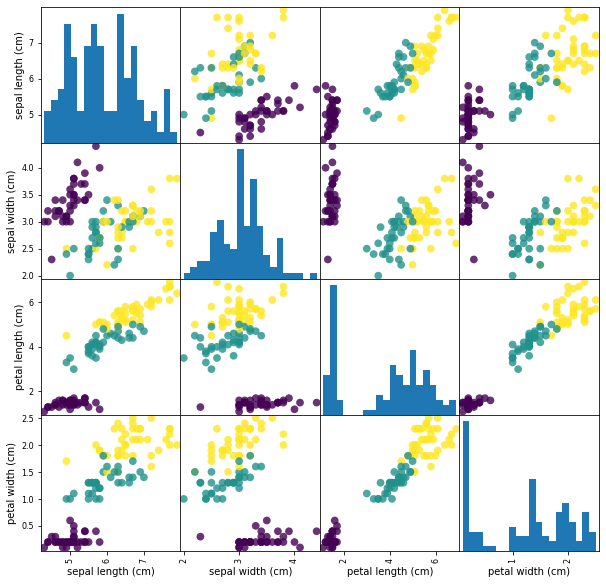

In [14]:
# create dataframe from data in X_train
iris_dataframe = pd.DataFrame(X_train, 
                              columns=iris_dataset.feature_names) # label columns using iris_dataset.feature_names


# create a scatter matrix from the dataframe, color by y_train
pd.plotting.scatter_matrix(iris_dataframe,        # data frame
                           c=y_train,             # colour by y_train
                           figsize=(10, 10),
                           marker='o', 
                           hist_kwds={'bins': 20},# plotting keyword arguments to be passed to hist function
                           s=60,                  # size of markers
                           alpha=.8,              # transparency of markers
                           cmap='viridis');         # colour map used for colour of each data plotted



<p align="center">
  <img src="img/iris_scatter.png" alt="Drawing" style="width: 300px;"/>
</p>

From the plots, we can see that the three classes seem to be relatively well separated using the sepal and petal measurements. 

This means that a machine learning model will likely be able to learn to separate them.


<a id='BuildingYourFirstModel'></a>
## 3.4 Building Your First Model: k-Nearest Neighbors






Now we can start building the actual machine learning model. 

There are many classification algorithms in `scikit-learn` that we could use. 

Here we will use a k-nearest neighbors classifier, which should be easy to understand as we applied it as a hand-coded solution earlier in the class (athletes example). 



__k-Nearest Neighbours__
- Store training set. 
- To make a prediction for a new data point, find the point in the training set that is closest to the new point. 
- Assign the label of this training point to the new data point.




We can consider any fixed number k of neighbors in the training (for example, the closest three or five neighbors). 

Then, we can make a prediction using the majority class among these neighbors. 

We will go into more detail about this later; for now, we’ll use just 1 neighbor.

The k-nearest neighbors classification algorithm comes from the `KNeighborsClassifier` __class__.

Before we can use the model, we need to *instantiate* the class into an __object__. 

This is when we will set any parameters of the model. 

The most important parameter of KNeighborsClassifier is the number of neighbors, which we will set to 1:


In [15]:
from sklearn.neighbors import KNeighborsClassifier # import model

knn = KNeighborsClassifier(n_neighbors=1)          # instatiate model

The `knn` object encapsulates:
- algorithm that will be used to build the model from the training data
- algorithm to make predictions on new data points. 
- information that the algorithm extracts from the training data. <br>(In the case of `KNeighborsClassifier` this is just the training data set).

To build the model on the training set, we call the `fit` method of the `knn` object.

Arguments:
- training data : the NumPy array `X_train`
- corresponding training labels : NumPy array `y_train`

The model is now *fitted* to the training data. 

In [16]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

The `fit` method returns the `knn` object itself (and modifies it in place).
<br>The output is a string representation of the classifier. 

The representation shows us which parameters were used in creating the model. 
- Nearly all of them are the default values.
- `n_neighbors=1` is the parameter that we set. 



Most models in `scikit-learn` have many optional parameters that you can set to customise the algorithm.
<br>Printing a `scikit-learn` model can return very long strings.

In this example, we will just use the default values.  
<br>We will study how to set important parameters in next week's class. 

<a id='MakingPredictions'></a>
## Making Predictions
We can now make predictions by applying the fitted model to new data for which we might not know the correct labels. 

Imagine we found an iris in the wild with:
- sepal length = 5 cm
- sepal width = 2.9 cm
- petal length = 1 cm
- petal width = 0.2 cm

What species of iris would this be? 

We can put this data into a NumPy array...



In [17]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape:", X_new.shape)

X_new.shape: (1, 4)


Note that we made the measurements of this single flower into a row in a two-dimensional NumPy array:
```
([[...]])
```
as scikit-learn always expects *two-dimensional arrays* for the data.



To make a prediction, we call the `predict` method of the `knn` object:

In [18]:
prediction = knn.predict(X_new) # make prediction about new data

print(f"Prediction: {prediction}")

print(f"Predicted target name: {iris_dataset['target_names'][prediction]}")

Prediction: [0]
Predicted target name: ['setosa']


Our model predicts that the new iris belongs to:
- the class 0
- the species setosa

But how do we know if we can trust our model? 

We don’t know the *correct* species of this sample.

<a id='EvaluatingModel'></a>
## 3.6 Evaluating the Model




We can use the __test__ set that we created earlier.

This data *was not* used to build the model.
<br>BUT we *do* know what the correct species is for each iris in the test data set.

Therefore, we can make a prediction for each iris in the test data and compare it against its label (the known species). 



We can measure how well the model works by computing the accuracy: <br>the fraction of flowers for which the right species was predicted:

In [19]:
y_pred = knn.predict(X_test)

print(f"Test set predictions:\n{y_pred}")

Test set predictions:
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [20]:
print(f"Test set score: {np.round(np.sum(y_pred == y_test)/len(y_test), 3)}")

#print(f"Test set score: {np.round(np.mean(y_pred == y_test), 3)}")

Test set score: 0.974


We can also use the `score` method of the `knn` object, which will compute the test set accuracy for us:

`score` uses a default evaluation criterion for each estimator, detailed in each estimator’s documentation.

In [21]:
print(f"Test set score: {knn.score(X_test, y_test)}")

Test set score: 0.9736842105263158


For this model, the test set accuracy is about 0.97.

The model made the right prediction for 97% of the irises in the test set. 

Under some mathematical assumptions, this means that we can expect our model to be correct 97% of the time for new irises. 

For our application, this high level of accuracy means that our model may be reliable enough. 

Next week we will discuss how we can improve performance, and tune a model.

<a id='ImportingData'></a>
# 4. Importing Data


The iris data set is a useful "toy" data set. 

However, in most cases we want to use real data, imported from external sources. 

`scikit_learn` works well with the pandas framework and we can run it's algorithms directly on Pandas `DataFrame`s. 

Let's take an example `DataFrame` from last week.

We are importing the `sample_student_data` set, selecting only the `Sex`, `Height` and `Weight` columns.

Let's examine the data to see if we can use the `Height` and `Weight` to accurately predict the `Sex` of a student. 

In [22]:
students = pd.read_csv('sample_data/sample_student_data.csv', skiprows=[1])

students = students.loc[: , ['Sex', 'Height', 'Weight']]

students.head()

,Sex,Height,Weight
0,M,1.82,92.4
1,M,1.77,80.9
2,F,1.68,69.7
3,M,1.77,80.9
4,F,1.68,69.7


The first thing we need to do is make the `Sex` column into numerical data so that it can be understood by the model. 

This is a common operation required for processing of real data. 

Later, we will study functions to achieve this using more complex data. 

For now, we will use a simple boolean array to convert:
- `M` --> `0`
- `F` --> `1`

A simple boolean array works will for *binary* data (only 2 classes). 

If we want to assign a unique integer value to a set of >2 classes, we need to do a little bit more work. 

We will introduce ways to automate this process later. 

For now, we will use some famiilar processes to assign the integer values: `list` and `for` loop...

In [23]:
students['Sex'] = students['Sex'] == 'M'       # boolean array using comparison operator

students['Sex'] = students['Sex'].astype(int)  # integer array using type conversion

students.head()

,Sex,Height,Weight
0,1,1.82,92.4
1,1,1.77,80.9
2,0,1.68,69.7
3,1,1.77,80.9
4,0,1.68,69.7


In [24]:
# import data
students = pd.read_csv('sample_data/sample_student_data.csv', skiprows=[1])  
students = students.loc[: , ['Sex', 'Height', 'Weight']]


# a list of unique string values
sexes = list(students['Sex'].unique())
#sexes = list(students.Sex.unique())
print(sexes)

# loop through each item in list and replace string item with a string number in DataFrame
for n, m in enumerate(sexes):
    print(n,m)
    students = students.replace({m: n})
    #students['Sex'] = students['Sex'].str.replace(m, str(n), regex=True)

# # convert string numerical data to integer
students['Sex'] = students['Sex'].astype(int)

# # display result
students.head()

['M', 'F']
0 M
1 F


,Sex,Height,Weight
0,0,1.82,92.4
1,0,1.77,80.9
2,1,1.68,69.7
3,0,1.77,80.9
4,1,1.68,69.7


Let's perform some of the operations we performed on the `iris` data set.

First we will split the data into test and training data sets. 

We can input the features and labels of the full data set as Pandas `Series` and `DataFrame`.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(students.loc[:,'Height' :], # features
                                                    students['Sex'],            # labels
                                                    random_state=0)

Examine the data:

In [26]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (16, 2)
y_train shape: (16,)
X_test shape: (6, 2)
y_test shape: (6,)


A scatter plot is created to compare the features and look for correlations.

Colour maps to produce the plot:
https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

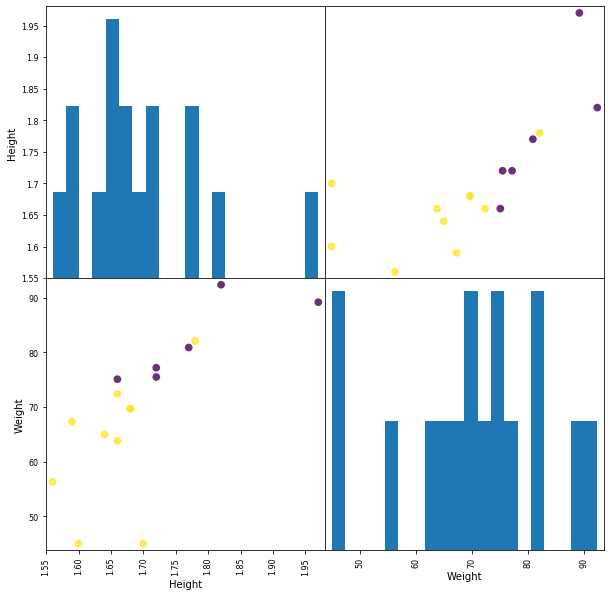

In [27]:
# create a scatter matrix from the X_train dataframe, color by y_train

pd.plotting.scatter_matrix(X_train,                 # data frame
                           c=y_train,               # colour by y_train
                           figsize=(10, 10),
                           marker='o', 
                           hist_kwds={'bins': 20},  # plotting keyword arguments to be passed to hist function
                           s=60,                    # size of markers
                           alpha=.8,                # transparency of markers
                           cmap='viridis');         # colour map used for colour of each data plotted

From the plots, we can see that the two classes:  females (purple) and males (yellow) seem to be relatively well separated using height and weight. 

This means that a machine learning model will likely be able to learn to separate them.

So all that's left to do is train the model and see how accuarately it predicts the test data.

In [28]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)

print(f"Test set score: {np.round(knn.score(X_test, y_test), 3)}")

Test set score: 0.667


0.667 isn't a great test score, but our data set is very small so the accuracy is reasonable. 

# Principal Component Analysis (PCA)

TODO : Add section on PCA

References : 

https://www.dezyre.com/data-science-in-python-tutorial/principal-component-analysis-tutorial

https://georgemdallas.wordpress.com/2013/10/30/principal-component-analysis-4-dummies-eigenvectors-eigenvalues-and-dimension-reduction/

First scale the data (exalpantion in next notebook on scaling data)

PCA performs best with a normalized feature set. 

We will perform standard scalar normalization to normalize our feature set. 

In [30]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler() 

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Performing PCA using Scikit-Learn is a two-step process:

1. Initialize the PCA class by passing the number of components to the constructor.
1. Call the fit and then transform methods by passing the feature set to these methods. The transform method returns the specified number of principal components.

In [31]:
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

The variance caused by each of the principal components.

In [33]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.72216128, 0.24132364, 0.03203983, 0.00447525])

Explicitly specify how much variance we would like PCA to capture. 

The n_components will vary based on the variance parameter.

(If you do not pass any variance, then the number of components will be equal to the original dimension of the data.)

In [38]:
pca = PCA(0.9)      # Two components make up over 0.9 of the variance. --> n_components == 2
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
pca.n_components_

2

A much higher score is achieved by removing the redundant dimensions

In [36]:
knn.fit(X_train, y_train)

print(f"Test set score: {np.round(knn.score(X_test, y_test), 3)}")

Test set score: 0.895


# Summary 
- __Supervised learning__ : The user provides the algorithm with pairs of inputs and desired outputs.
<br>__Un-supervised learning__ : Only the input data is known. No known output data is given to the algorithm.

- Supervised Learning Algorithm
    - build a machine learning model from training data
    - test that the model can predict the species of iris for a new set of measurements
    - apply our model to new measurements

- Before building a machine learning model inspect the data, to see if:
    - the task is easily solvable without machine learning
    - the desired information might not be contained in the data

- Evaluate the accuracuy of the fitted model using the test data set. 

__Summary of the code__ needed for the whole training and evaluation procedure:

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier    # 1. Import model
from sklearn.datasets import load_iris                # 2. Import data
iris_dataset = load_iris()



X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'],     # 3. Split the data
                                                    iris_dataset['target'], 
                                                    random_state=0)

knn = KNeighborsClassifier(n_neighbors=1) # 4. Instantaite the model including any model parameters

knn.fit(X_train, y_train)                 # 5. Fit the model to the training data

score = knn.score(X_test, y_test)         # 6. Evaluate the accuracy of the model on the test data
print(f"Test set score: {np.round(score), 3}") 

knn.predict(X_test)                       # 7. Predict the targets of the test data

X_new = np.array([[5, 2.9, 1, 0.2]])      # 8. Predict the target of a new data point 
prediction = knn.predict(X_new)
print(f"Predicted target name: {iris_dataset['target_names'][prediction]}")

Test set score: (1.0, 3)
Predicted target name: ['setosa']


## METHOD CHAINING
Notice that we can chain methids together:

```
knn = KNeighborsClassifier(n_neighbors=1)
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
```

...can be written as...

```
knn = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
y_pred = knn.predict(X_test)
```

...can be written as...
```
y_pred = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train).predict(X_test)
```

The method we choose depends on if we want to store the *fitted* KNN model as a variable.

Storing it allows us to:
- inspect it
- use it to predict on other data

Refitting the model to accomplish these tasks can take a considerable amount of time whent he data set it large.

<a id='ReviewExercises'></a>
# 5. Review Exercise : KNN Classifier with Real Data

You are now going to build a KNN classifier for the data in the `planets DataFrame` that we studied last week. 

The exercise will involve:
- manipulating the data using:
    - programing fundamentals
    - Pandas operation studied last week
- Building a KNN machine learning model to identify the __measurement method__ (`method`) used for a planet from feature data including it's orbital period and distance. 


1. Import the `planets` data from the `seaborn` package to a Pandas `DataFrame` as we did last week. 
1. Drop null (`NaN`) values:
    - show how many null values appear in each column
    - drop any *columns* where less than half the values are non-null
    - drop all remaining *rows* containing null values
1. Create a column with a __unique integer value__ to represent each unique string value in the `method` column of the `DataFrame`. <br>*Hint : If using the method demonstrated today, you must __reverse__ the order of the list created using the `.unique()` method. This is because the string `Transit` appears __twice__, once by itself and once as part of another string.*
1. Split the data set into training and test data
1. Create a scatter plot to check if the different `method` classes/targets can be separated using the features
1. Import the KNN model, instantiate and fit the model to the training data
1. What percentage of the test data does the model predict correctly? 
1. Look at step 5 again. <br>Do some features seperate the classes better than others? <br>What happens if you remove the features that do not seperate the classes well? <br>How does this effect the accuracy of the model prediction? <br>__Note__: Normally this process of identifying __feature importance__ would be automated. We will consider this in a later class. 




method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64
0 Pulsar Timing
1 Orbital Brightness Modulation
2 Transit Timing Variations
3 Astrometry
4 Transit
5 Imaging
6 Eclipse Timing Variations
7 Radial Velocity
Test set score: 0.938


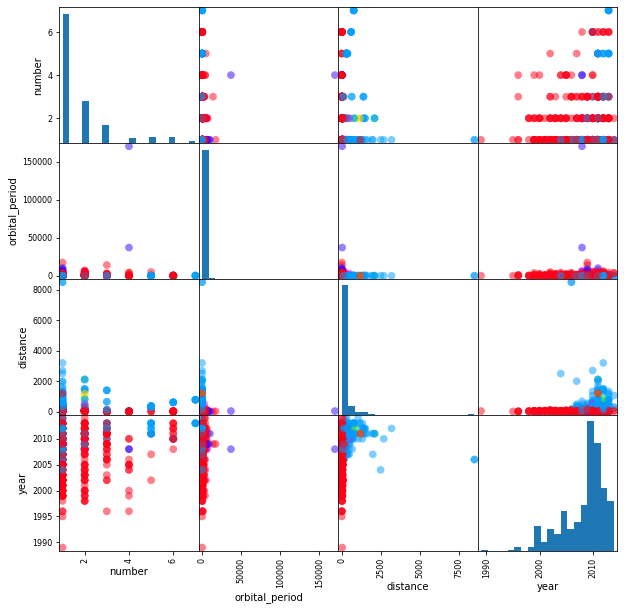

In [204]:
# Revew Exercise
# Example Solution

# 1. Import the planets data
import seaborn as sns
planets = sns.load_dataset('planets')
#print(planets.shape)

# 6. Import the KNN model 
from sklearn.neighbors import KNeighborsClassifier


# 2. Drop null (NaN) values:
print(planets.isnull().sum())                     # show how many null values appear in each column
planets=planets.dropna(axis='columns',            # drop any columns where less than half the values are non-null
                       thresh=planets.shape[0]/2)    
#planets=planets.drop(['mass'], axis=1)

planets = planets.dropna()                        # drop all remaining rows containing null values


# 3. Create a column with a unique integer value for each method
planets['method_int'] = planets['method']
methods = list(planets.method.unique())
methods.reverse()
for n, m in enumerate(methods):
    print(n,m)
    planets['method_int'] = planets['method_int'].str.replace(m, str(n), regex=True)

planets.method_int = planets.method_int.astype(int)

    
# 4. Split the data
X_train, X_test, y_train, y_test = train_test_split(planets.loc[:, 'number':'year'], # features
                                                    planets['method_int'],     # labels
                                                    random_state=0)

# 5. create a scatter matrix from the X_train dataframe, color by y_train
pd.plotting.scatter_matrix(X_train,                 # data frame
                           c=y_train,               # colour by y_train
                           figsize=(10, 10),
                           marker='o', 
                           hist_kwds={'bins': 20},  # plotting keyword arguments to be passed to hist function
                           s=60,                    # size of markers
                           alpha=.5,                # transparency of markers
                           cmap='hsv');             # colour map used for colour of each data plotted

# 6. Instantiate the model and fit the model to the training data
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# 7. What percentage of the test data does the model predict correctly?
print(f"Test set score: {np.round(knn.score(X_test, y_test), 3)}")